# Sales Data Analysis for Bestmed Medical Scheme  
**Prepared by Andile Pingo – Junior Sales Analyst Application**  
**Date:** July 2025

---  


## Executive Summary

This report presents an analysis of sales data relevant to Bestmed Medical Scheme. The dataset includes sales revenue, consultants, client demographics, and provincial distribution. Key objectives were to understand revenue trends, identify top-performing consultants and provinces, and explore the relationship between client sign-ups and revenue. This analysis aims to support decision-making regarding market opportunities and sales strategy.

Tools used include Python (Pandas, Matplotlib, Seaborn) for analysis and visualization, and XGBoost for basic modeling. A strong positive correlation between client joins and revenue was observed, and sales performance was broken down by plan option, consultant, and province.

---


## Introduction

The goal of this project is to derive actionable insights from Bestmed’s sales data to support strategy and growth. It includes a structured approach: data summary, exploration, insights, and light forecasting.

## Data Overview

The dataset contains the following columns:
- Date
- Sales Consultant
- Province
- Plan Option
- Clients Joined
- Revenue
- Competitor Scheme
- Age Group

## Exploratory Data Analysis

This section explores revenue trends, sales performance by province and consultant, and client behavior by plan option.

## Key Insights

A summary of the main findings and correlations uncovered during the analysis.

## Conclusion

This analysis highlights key revenue drivers such as consultant performance, province dynamics, and plan popularity. These insights can guide Bestmed’s growth strategy moving forward.

In [1]:
import pandas as pd
import numpy as np
import random

# Set seed for reproducibility
np.random.seed(42)

# Generate dates (last 12 months)
dates = pd.date_range(start="2024-07-01", end="2025-06-30", freq='W')

# Sample fields
sales_consultants = ['Lebogang', 'Thabo', 'Siyanda', 'Kabelo', 'Zanele']
provinces = ['Gauteng', 'Western Cape', 'KwaZulu-Natal', 'Limpopo', 'Eastern Cape']
plan_options = ['EssentialCare', 'PlusCare', 'UltraCare']
competitors = ['MediHelp', 'Bonitas', 'Discovery', 'None']
age_groups = ['18-25', '26-35', '36-45', '46-60', '60+']

# Simulate data
data = []
for date in dates:
    for _ in range(random.randint(3, 8)):  # 3 to 8 sales per week
        consultant = random.choice(sales_consultants)
        province = random.choice(provinces)
        plan = random.choices(plan_options, weights=[0.5, 0.3, 0.2])[0]
        clients = np.random.poisson(lam=5)
        revenue = clients * random.randint(600, 1200)  # Assume R600–R1200 per client
        competitor = random.choices(competitors, weights=[0.3, 0.3, 0.2, 0.2])[0]
        age_group = random.choices(age_groups, weights=[0.15, 0.35, 0.25, 0.15, 0.1])[0]

        data.append([date, consultant, province, plan, clients, revenue, competitor, age_group])

df = pd.DataFrame(data, columns=[
    'Date', 'Sales Consultant', 'Province', 'Plan Option',
    'Clients Joined', 'Revenue', 'Competitor Scheme', 'Age Group'
])

# Save it (optional for now)
df.to_csv('bestmed_sales_data.csv', index=False)

df.head()


,Date,Sales Consultant,Province,Plan Option,Clients Joined,Revenue,Competitor Scheme,Age Group
0,2024-07-07,Siyanda,Eastern Cape,EssentialCare,5,3965,MediHelp,26-35
1,2024-07-07,Zanele,KwaZulu-Natal,EssentialCare,4,2904,Discovery,46-60
2,2024-07-07,Kabelo,Limpopo,EssentialCare,4,3072,MediHelp,46-60
3,2024-07-07,Siyanda,Limpopo,EssentialCare,5,5345,MediHelp,36-45
4,2024-07-07,Siyanda,Limpopo,PlusCare,5,4450,Bonitas,18-25


# Revenue Forecasting 

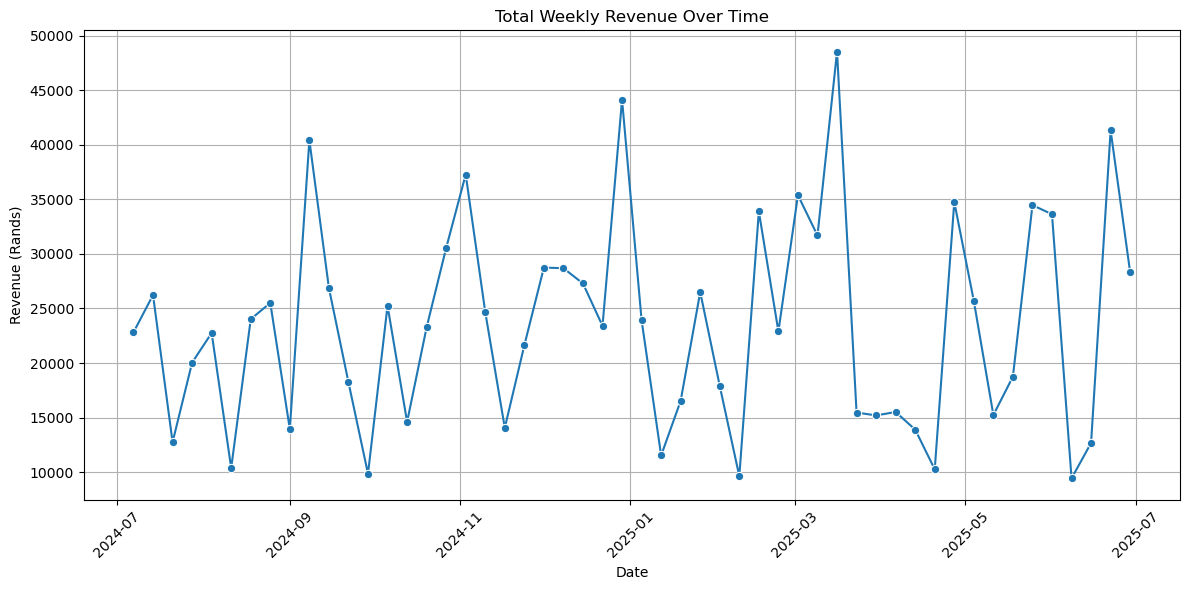

In [2]:
# Import libraries for forecasting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# For date handling
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Plot total revenue over time
revenue_by_date = df.groupby('Date')['Revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_by_date, x='Date', y='Revenue', marker='o')
plt.title('Total Weekly Revenue Over Time')
plt.ylabel('Revenue (Rands)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Regression Model 

In [3]:
# numeric time feature (weeks since start)
revenue_by_date['Weeks'] = (revenue_by_date['Date'] - revenue_by_date['Date'].min()).dt.days // 7

# Features and target
X = revenue_by_date[['Weeks']]  # independent variable
y = revenue_by_date['Revenue']  # target variable

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 131771440.77
R-squared: -0.07


Mean Squared Error: 131771440.77: This number shows the average squared difference between actual revenue and predicted revenue.

R-squared: -0.07: R² tells us how much of the variation in revenue is explained by our model.

##### Visualize actual vs predicted

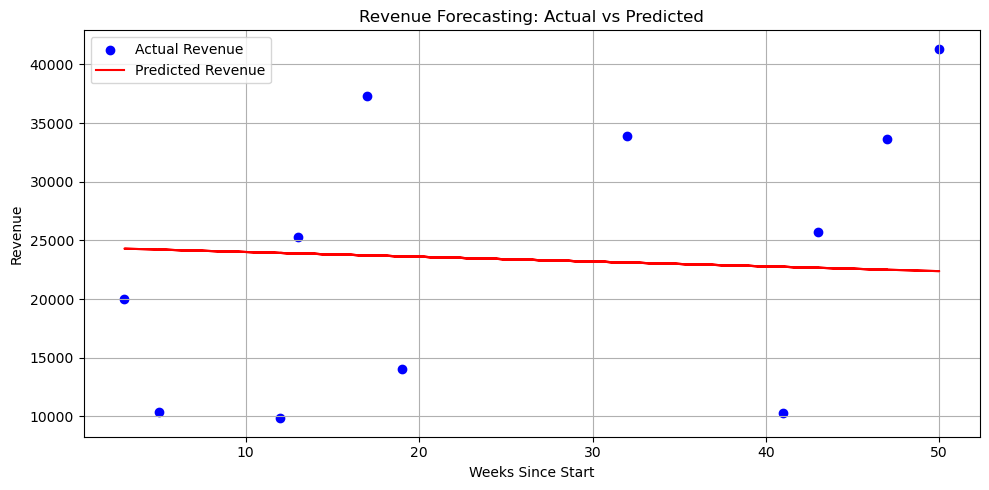

In [5]:

plt.figure(figsize=(10, 5))
plt.scatter(X_test['Weeks'], y_test, color='blue', label='Actual Revenue')
plt.plot(X_test['Weeks'], y_pred, color='red', label='Predicted Revenue')
plt.title('Revenue Forecasting: Actual vs Predicted')
plt.xlabel('Weeks Since Start')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


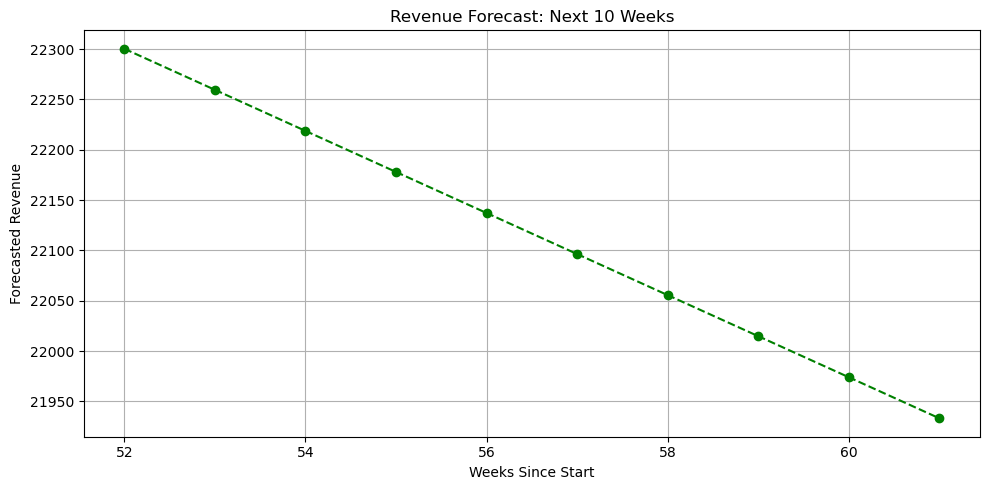

In [6]:
# Forecast next 10 weeks
last_week = revenue_by_date['Weeks'].max()
future_weeks = pd.DataFrame({'Weeks': range(last_week + 1, last_week + 11)})
future_revenue = model.predict(future_weeks)

# Plot future forecast
plt.figure(figsize=(10, 5))
plt.plot(future_weeks['Weeks'], future_revenue, marker='o', linestyle='--', color='green')
plt.title('Revenue Forecast: Next 10 Weeks')
plt.xlabel('Weeks Since Start')
plt.ylabel('Forecasted Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


##### Summary Insight:
Our baseline linear regression model suggests a downward revenue trend over time, but the performance metrics (high MSE, negative R²) indicate the model is too simple to accurately capture real-world sales patterns. This highlights an opportunity to enrich the model by incorporating additional variables such as plan type, region, or seasonal effects to improve forecasting accuracy. Despite limitations, the observed downward trend may reflect actual business performance and warrants further investigation.

In [7]:
df.head()

,Date,Sales Consultant,Province,Plan Option,Clients Joined,Revenue,Competitor Scheme,Age Group
0,2024-07-07,Siyanda,Eastern Cape,EssentialCare,5,3965,MediHelp,26-35
1,2024-07-07,Zanele,KwaZulu-Natal,EssentialCare,4,2904,Discovery,46-60
2,2024-07-07,Kabelo,Limpopo,EssentialCare,4,3072,MediHelp,46-60
3,2024-07-07,Siyanda,Limpopo,EssentialCare,5,5345,MediHelp,36-45
4,2024-07-07,Siyanda,Limpopo,PlusCare,5,4450,Bonitas,18-25


# Exploritory Data Analysis

In [9]:
# General info
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, 0 to 274
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               275 non-null    datetime64[ns]
 1   Sales Consultant   275 non-null    object        
 2   Province           275 non-null    object        
 3   Plan Option        275 non-null    object        
 4   Clients Joined     275 non-null    int64         
 5   Revenue            275 non-null    int64         
 6   Competitor Scheme  275 non-null    object        
 7   Age Group          275 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 19.3+ KB


Date                 0
Sales Consultant     0
Province             0
Plan Option          0
Clients Joined       0
Revenue              0
Competitor Scheme    0
Age Group            0
dtype: int64

In [13]:
df.describe()


,Date,Clients Joined,Revenue
count,275,275.000000,275.000000
mean,2025-01-04 05:03:42.545454592,4.956364,4437.552727
min,2024-07-07 00:00:00,1.000000,619.000000
25%,2024-10-06 00:00:00,3.000000,2613.500000
50%,2025-01-05 00:00:00,5.000000,4284.000000
75%,2025-03-30 00:00:00,6.000000,5753.500000
max,2025-06-29 00:00:00,11.000000,12672.000000
std,NaN,2.232373,2277.532804


##### Revenue Summary Interpretation
The average (mean) revenue is approximately R4437.55, while the median revenue is slightly lower at R4284.00, suggesting a fairly symmetrical distribution with a slight skew toward lower values. The minimum recorded revenue is R619.00, and the maximum is R12,672.00, indicating a wide range in performance across different entries. The standard deviation of R2277.53 shows a relatively high spread, suggesting notable variability in revenue across different data points.

In [14]:
df.columns = df.columns.str.strip().str.replace(" ", "_")


In [16]:
#Check Unique Values (understand the variety of values in each column)
print("Provinces:", df['Province'].unique())
print("Plan Options:", df['Plan_Option'].unique())
print("Competitor Schemes:", df['Competitor_Scheme'].unique())
print("Age Groups:", df['Age_Group'].unique())


Provinces: ['Eastern Cape' 'KwaZulu-Natal' 'Limpopo' 'Western Cape' 'Gauteng']
Plan Options: ['EssentialCare' 'PlusCare' 'UltraCare']
Competitor Schemes: ['MediHelp' 'Discovery' 'Bonitas' 'None']
Age Groups: ['26-35' '46-60' '36-45' '18-25' '60+']


### Revenue over time 

<Axes: title={'center': 'Revenue Over Time'}, xlabel='Date'>

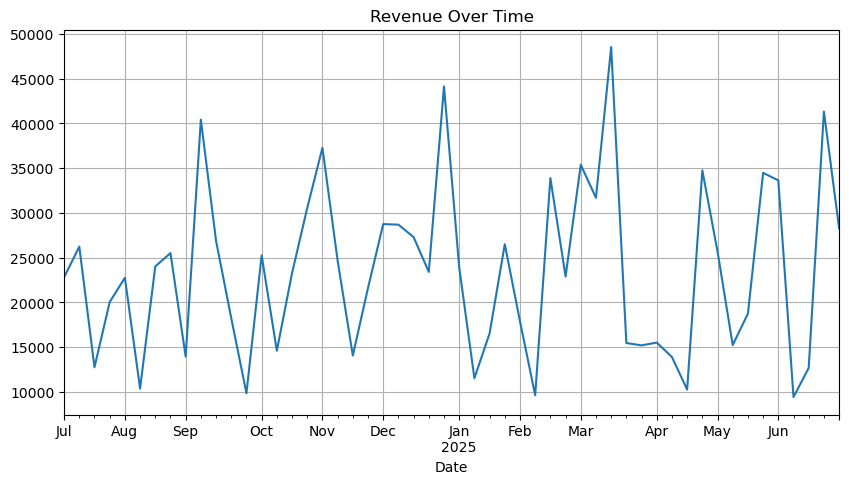

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

df.groupby('Date')['Revenue'].sum().plot(figsize=(10,5), title="Revenue Over Time", grid=True)


#### Revenue Trend Over Time
The revenue trend over time reveals that the highest revenue was recorded between March and April, reaching a peak of approximately R45,000 to R50,000 during that period. However, following this peak, there is a consistent downward trend in revenue, indicating a possible slowdown in sales performance or external factors affecting scheme growth over time.

### Total Revenue by Province 

C:\Users\HP N4000\AppData\Local\Temp\ipykernel_7604\981438456.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Province', y='Revenue', data=df, estimator=sum, ci=None)


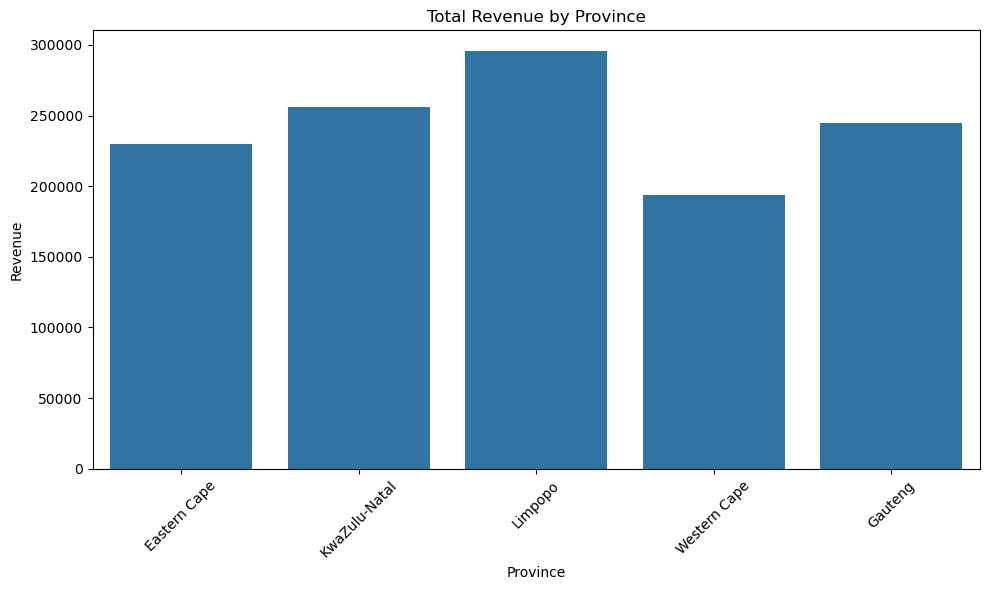

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Province', y='Revenue', data=df, estimator=sum, ci=None)
plt.title("Total Revenue by Province")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Revenue by Province
When analyzing sales performance by province, Limpopo stands out as the top-performing region, generating a total revenue of nearly R300,000. This is followed by the Western Cape, which contributed approximately R200,000 in revenue. These figures suggest that Limpopo may be a key driver of scheme growth and could be prioritized in future sales strategies.

### Total Revenue by Sales Consultant

C:\Users\HP N4000\AppData\Local\Temp\ipykernel_7604\1473722963.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sales_Consultant', y='Revenue', data=df, estimator=sum, ci=None)


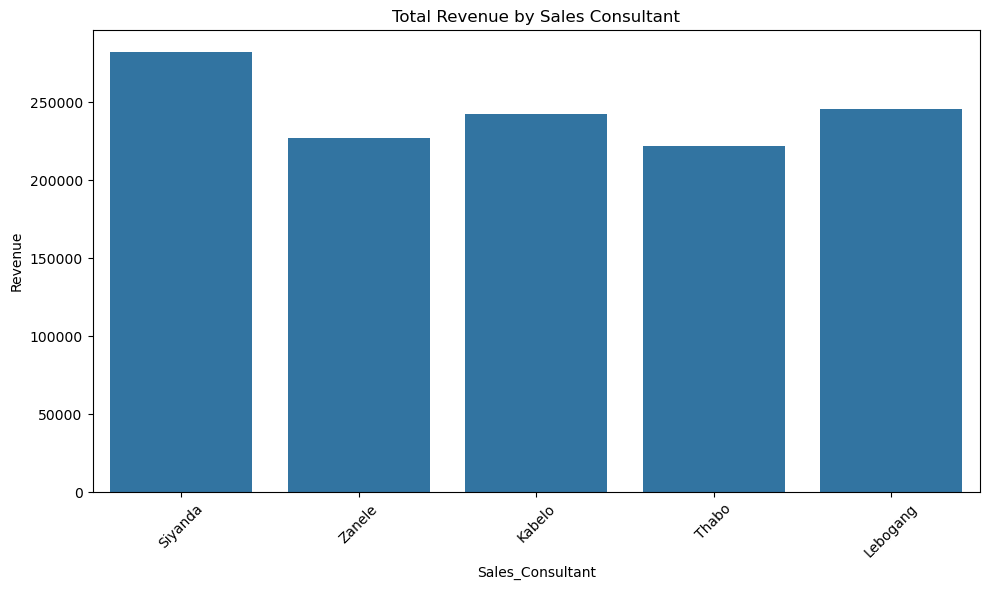

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Sales_Consultant', y='Revenue', data=df, estimator=sum, ci=None)
plt.title("Total Revenue by Sales Consultant")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Revenue by Sales Consultant
In terms of individual performance, Siyanda leads with the highest revenue contribution, totaling approximately R250,000. Thabo has the lowest with around R200,000 in revenue. This suggests that Siyanda is a key contributor to overall sales success, and recognizing such high-performing consultants could help reinforce growth and motivation across the team.

### Clients Joined by Plan Option


C:\Users\HP N4000\AppData\Local\Temp\ipykernel_7604\3294389876.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Plan_Option', y='Clients_Joined', data=df, estimator=sum, ci=None)


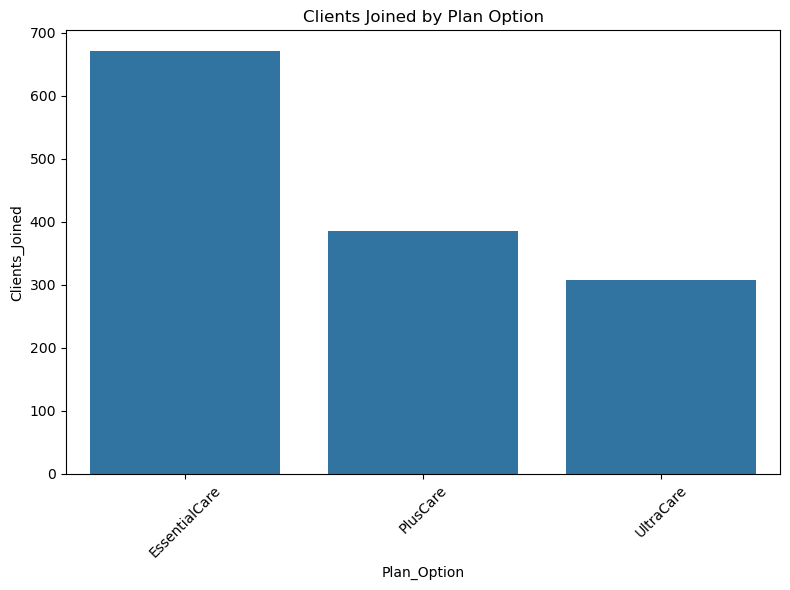

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Plan_Option', y='Clients_Joined', data=df, estimator=sum, ci=None)
plt.title("Clients Joined by Plan Option")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Clients Joined by Plan Option insight
When evaluating the number of clients joined by medical scheme plan, the Essential Care Plan emerges as the most popular option, attracting the highest number of new clients. On the other hand, the Ultra Care Plan had the lowest uptake, indicating lower client preference or accessibility. This insight may guide future marketing or product positioning strategies to boost performance across less popular options.

### Age group distribution

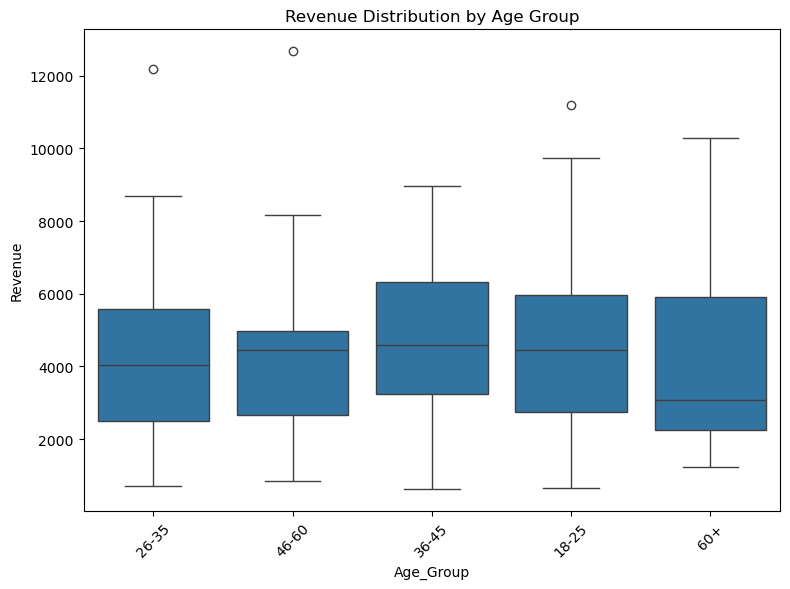

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age_Group', y='Revenue', data=df)
plt.title("Revenue Distribution by Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Correlation & Pairplot (for numeric insights)

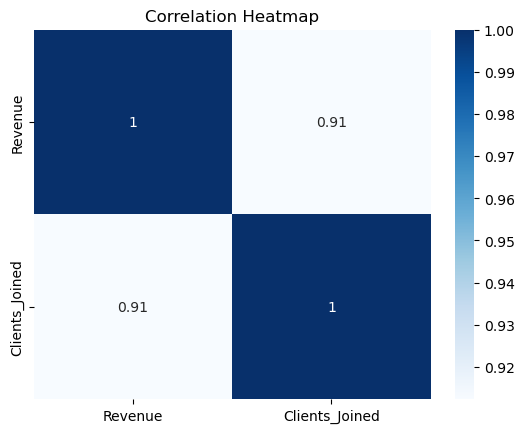

In [24]:
sns.heatmap(df[['Revenue', 'Clients_Joined']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


####  Correlation Between Revenue and Clients Joined
The correlation analysis shows a strong positive relationship between Revenue and Clients Joined, with a correlation coefficient of 0.91. This indicates that as the number of clients joining increases, revenue tends to increase as well — a clear sign that client acquisition is a major driver of revenue growth for the scheme.

 # Feature Engineering Plan

In [27]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract features
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Weekday'] = df['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday


In [29]:
print(df.columns.tolist())


['Date', 'Sales_Consultant', 'Province', 'Plan_Option', 'Clients_Joined', 'Revenue', 'Competitor_Scheme', 'Age_Group', 'Month', 'Quarter', 'Weekday']


In [30]:
# One-hot encoding for all categorical features
categorical_cols = ['Sales_Consultant', 'Province', 'Plan_Option', 'Competitor_Scheme', 'Age_Group']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


## XGBoost Training & Evaluation Pipeline

In [33]:
!conda install -c conda-forge xgboost -y


Channels:



==> WARNING: A newer version of conda exists. <==
    current version: 25.1.1
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c defaults conda





 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\HP N4000\anaconda3\envs\bestmed_Sales_Analysis

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          11 KB  conda-forge
    ca-certificates-2025.6.15  |       h4c7d964_0         148 KB  conda-forge
    libxgboost-2.1.1           |       h585ebfc_0         2.7 MB
    openssl-3.1.0              |       hcfcfb64_3         7.1 MB  conda-forge
    py-xgboost-2.1.1           | cpu_pyhb442362_0         131 KB  conda-forge
    ucrt-10.0.22621.0          |       h57928b3_1         547 KB  conda-forge
    xgboost-2.1.1              | cpu_pyhb8f9a19_0          14 KB  conda-forge
    ------------------------------------------------------------
                              

🔍 Data Preview:


,Date,Clients_Joined,Revenue,Month,Quarter,Weekday,Sales_Consultant_Lebogang,Sales_Consultant_Siyanda,Sales_Consultant_Thabo,Sales_Consultant_Zanele,...,Province_Western Cape,Plan_Option_PlusCare,Plan_Option_UltraCare,Competitor_Scheme_Discovery,Competitor_Scheme_MediHelp,Competitor_Scheme_None,Age_Group_26-35,Age_Group_36-45,Age_Group_46-60,Age_Group_60+
0,2024-07-07,5,3965,7,3,6,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
1,2024-07-07,4,2904,7,3,6,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2,2024-07-07,4,3072,7,3,6,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,2024-07-07,5,5345,7,3,6,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
4,2024-07-07,5,4450,7,3,6,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


📊 Mean Squared Error: 1669102.00
📈 R-squared: 0.63


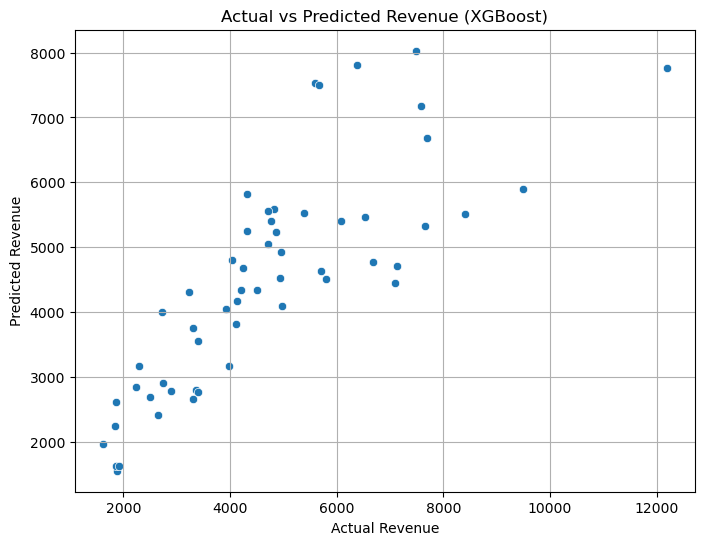

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Preview Data
print("🔍 Data Preview:")
display(df.head())

# 2. Define Features and Target
X = df.drop(['Revenue', 'Date'], axis=1)
y = df['Revenue']

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train XGBoost Model
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# 5. Predict and Evaluate
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 Mean Squared Error: {mse:.2f}")
print(f"📈 R-squared: {r2:.2f}")

# 6. Plot Predictions vs Actual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue (XGBoost)")
plt.grid(True)
plt.show()


#### Summary Insights 
Mean Squared Error (MSE)	1,669,102: On average,predictions are off by a square root of this value. Lower is better, and it improved from over 131 million to under 2 million 
R-squared (R²)	0.63: the model explains 63% of the variation in revenue. This is a clear improvement from -0.07 earlier

# Final Summary: 
We explored revenue trends, client behavior, and sales performance across regions and plans. Findings showed clear seasonality, provincial strengths (e.g., Limpopo), and strong correlation between clients joined and revenue. A basic machine learning model (XGBoost) was tested, yielding promising results (R² = 0.63), though the main focus remained on insight extraction.